In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/SigmaCampNext-2025`


In [2]:
Pkg.add(["Plots","ModelingToolkit","OrdinaryDiffEqTsit5","Lux","ADTypes","Optimisers","MLUtils","Zygote"])

   Resolving package versions...
    Updating `~/Documents/programming/SigmaCampNext-2025/Project.toml`
  [1dea7af3] + OrdinaryDiffEq v6.101.0
    Updating `~/Documents/programming/SigmaCampNext-2025/Manifest.toml`
  [d4d017d3] + ExponentialUtilities v1.27.0
  [442a2c76] + FastGaussQuadrature v1.0.2
  [c145ed77] + GenericSchur v0.5.5
  [1dea7af3] + OrdinaryDiffEq v6.101.0
  [89bda076] + OrdinaryDiffEqAdamsBashforthMoulton v1.5.0
⌃ [6ad6398a] + OrdinaryDiffEqBDF v1.9.0
⌃ [50262376] + OrdinaryDiffEqDefault v1.7.0
⌃ [4302a76b] + OrdinaryDiffEqDifferentiation v1.11.0
  [9286f039] + OrdinaryDiffEqExplicitRK v1.4.0
⌃ [e0540318] + OrdinaryDiffEqExponentialRK v1.7.0
⌃ [becaefa8] + OrdinaryDiffEqExtrapolation v1.7.0
⌃ [5960d6e9] + OrdinaryDiffEqFIRK v1.15.0
  [101fe9f7] + OrdinaryDiffEqFeagin v1.4.0
  [d3585ca7] + OrdinaryDiffEqFunctionMap v1.5.0
  [d28bc4f8] + OrdinaryDiffEqHighOrderRK v1.5.0
⌃ [9f002381] + OrdinaryDiffEqIMEXMultistep v1.6.0
  [521117fe] + OrdinaryDiffEqLinear v1.6.0
  [1344f3

In [4]:
using Plots, ModelingToolkit, OrdinaryDiffEqTsit5, Random, Lux, ADTypes, Optimisers, Zygote, Printf, MLUtils

In [5]:
using ModelingToolkit: t_nounits as t, D_nounits as D

In [6]:
@mtkmodel Lorenz begin
    @parameters begin
        σ = 10.0
        ρ = 26.0
        β = 8/3
    end
    @variables begin
        x(t) = 1.0 # dependent variables
        y(t) = 0.0
        z(t) = 0.0
    end
    @equations begin
        D(x) ~ σ * (y - x)
        D(y) ~ x * (ρ - z) - y
        D(z) ~ x * y - β * z
    end
end

ModelingToolkit.Model{typeof(__Lorenz__), Dict{Symbol, Any}}(Main.__Lorenz__, Dict{Symbol, Any}(:variables => Dict{Symbol, Dict{Symbol, Any}}(:y => Dict(:default => 0.0, :type => Real), :z => Dict(:default => 0.0, :type => Real), :x => Dict(:default => 1.0, :type => Real)), :kwargs => Dict{Symbol, Dict}(:ρ => Dict{Symbol, Any}(:value => 26.0, :type => Real), :σ => Dict{Symbol, Any}(:value => 10.0, :type => Real), :y => Dict{Symbol, Any}(:value => 0.0, :type => Real), :z => Dict{Symbol, Any}(:value => 0.0, :type => Real), :β => Dict{Symbol, Any}(:value => :(8 / 3), :type => Real), :x => Dict{Symbol, Any}(:value => 1.0, :type => Real)), :independent_variable => :t, :parameters => Dict{Symbol, Dict{Symbol, Any}}(:ρ => Dict(:default => 26.0, :type => Real), :σ => Dict(:default => 10.0, :type => Real), :β => Dict(:default => :(8 / 3), :type => Real)), :equations => Any["D(x) ~ σ * (y - x)", "D(x) ~ σ * (y - x)", "D(y) ~ x * (ρ - z) - y", "D(x) ~ σ * (y - x)", "D(y) ~ x * (ρ - z) - y", "D(z)

In [12]:
@mtkbuild lorenz = Lorenz()
prob = ODEProblem(lorenz, [], (0.0, 100), [])
sol = solve(prob, Tsit5(); reltol=1e-10, abstol=1e-11)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 30953-element Vector{Float64}:
   0.0
   0.0009026540305243168
   0.0014894754347955224
   0.00235734406331401
   0.003187907717243731
   0.004153114505628712
   0.005153337107327233
   0.006234523636109482
   0.007364989932354748
   0.008554627019826056
   0.009792040981468603
   0.011077575646491002
   0.01240604364126476
   ⋮
  99.9660425986133
  99.9693947137519
  99.97275254895277
  99.9761171802697
  99.97948963487421
  99.98287090482602
  99.98626195780622
  99.98966375001183
  99.9930772350733
  99.99650337451352
  99.99994314532456
 100.0
u: 30953-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9911193334455038, 0.02335366499446452, 1.0486234146015071e-5]
 [0.9855010572988786, 0.03841437282659366, 2.8368748643700336e-5]
 [0.9774129327747108, 0.060517064214950574, 7.039216238276344e-5]
 [0.9699160199272091, 0.08148352564865147, 0.0001275932312476106]
 [0.9614983925277145, 0.10562717755815398, 0.

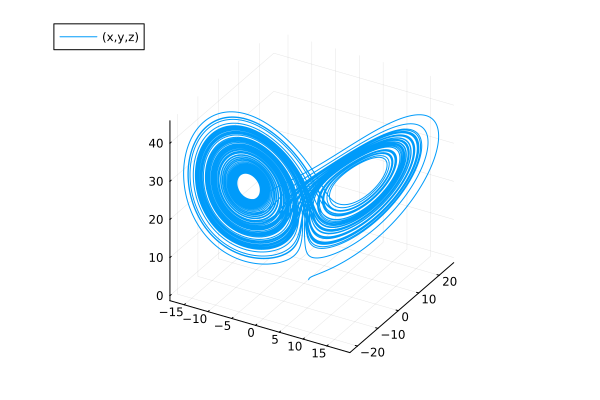

In [13]:
plot(sol, idxs = (1, 2, 3))

In [11]:
rng = MersenneTwister()
Random.seed!(rng, 12345)

MersenneTwister(12345)

In [14]:
sol_list = []
u0_list = []
for i in 1:100
    ric = 30*(rand(3).-0.5)
    new_prob = remake(prob, u0 = ric, tspan = (0,8))
    sol = solve(new_prob, Tsit5(); reltol=1e-10, abstol=1e-11, saveat=0.01)
    push!(sol_list, sol)
    push!(u0_list,ric)
end

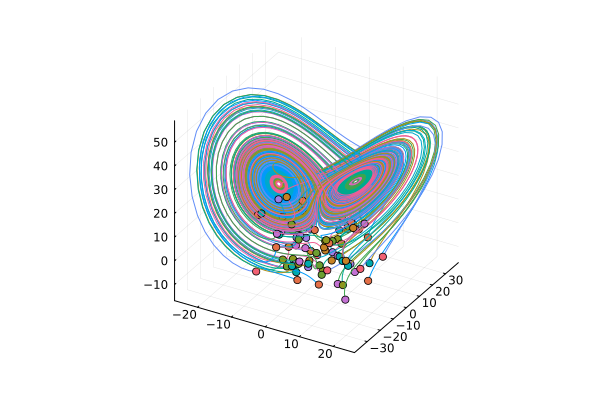

In [15]:
p = plot(sol_list[1],idxs = (1, 2, 3), legend=nothing)
scatter!(p, sol_list[1][1:1], idxs = (1,2,3))
for i in 2:100
    plot!(p, sol_list[i],idxs = (1, 2, 3))
    scatter!(p,sol_list[i][1:1], idxs = (1,2,3))
end
p

In [16]:
sol_array = Array(sol_list[1])
input = sol_array[:,1:end-1]
output = sol_array[:,2:end]
for i in 2:100
    sol_array = Array(sol_list[i])
    input = hcat(sol_array[:,1:end-1],input)
    output = hcat(sol_array[:,2:end],output)
end

In [17]:
input = Float32.(input)

3×80000 Matrix{Float32}:
 -10.7167   -9.34284  -8.22952  -7.33968   …  -5.67183  -5.97947  -6.30716
   4.45991   3.02734   1.72852   0.552674     -8.64797  -9.15622  -9.68407
  12.4144   11.718    11.2041   10.8219       15.6997   15.7983   15.9537

In [18]:
output = Float32.(output)

3×80000 Matrix{Float32}:
 -9.34284  -8.22952  -7.33968   -6.64112   …  -5.97947  -6.30716   -6.65475
  3.02734   1.72852   0.552674  -0.516485     -9.15622  -9.68407  -10.2287
 11.718    11.2041   10.8219    10.536        15.7983   15.9537    16.1707

In [119]:
80000*0.9

72000.0

In [19]:
# Process images into (H, W, C, BS) batches
i_data = Float32.(reshape(input, size(input, 1), 1, size(input, 2)))
o_data = Float32.(reshape(output, size(output, 1), 1, size(output, 2)))
(i_train, o_train), (i_test, o_test) = splitobs((i_data, o_data); at=0.9)
train_dataloader = DataLoader(collect.((i_train, o_train)); batchsize=200, shuffle=true)
test_dataloader = DataLoader(collect.((i_test, o_test)); batchsize=200, shuffle=true)

40-element DataLoader(::Tuple{Array{Float32, 3}, Array{Float32, 3}}, shuffle=true, batchsize=200)
  with first element:
  (3×1×200 Array{Float32, 3}, 3×1×200 Array{Float32, 3},)

In [20]:
radbas(x) = exp(-x^2)

radbas (generic function with 1 method)

In [21]:
model = Chain(Dense(3 => 15, gelu), Dense(15 => 15, gelu), Dense(15 => 15, gelu), Dense(15 => 3))

Chain(
    layer_1 = Dense(3 => 15, gelu_tanh),  # 60 parameters
    layer_2 = Dense(15 => 15, gelu_tanh),  # 240 parameters
    layer_3 = Dense(15 => 15, gelu_tanh),  # 240 parameters
    layer_4 = Dense(15 => 3),           # 48 parameters
)         # Total: 588 parameters,
          #        plus 0 states.

In [22]:
opt = Adam(0.001)

Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8)

In [23]:
const loss_function = MSELoss()

(::GenericLossFunction{typeof(Lux.LossFunctionImpl.l2_distance_loss), typeof(Statistics.mean)}) (generic function with 2 methods)

In [24]:
ps, st = Lux.setup(rng, model)

((layer_1 = (weight = Float32[-0.183568 -0.92131305 0.40874434; -0.30658865 0.26954746 0.68617535; … ; -0.70242906 0.3783126 -0.73464155; -0.9572215 -0.047445536 -0.9029546], bias = Float32[-0.0039845845, 0.49106497, -0.25245777, -0.5153554, 0.5414904, 0.5325659, 0.27861091, 0.29952037, 0.28986335, 0.43098497, -0.5526006, -0.31670323, -0.43751305, 0.4889461, 0.15536425]), layer_2 = (weight = Float32[-0.009902067 0.26185304 … -0.29768458 -0.04518438; 0.38856193 0.34045488 … -0.11975146 0.25010285; … ; 0.41388726 -0.3255756 … -0.10941629 0.08625297; 0.12637453 0.07296271 … 0.20773835 0.2690959], bias = Float32[-0.118697256, -0.08593251, 0.1788261, 0.112810574, -0.098139495, 0.15948524, -0.11960348, 0.13434197, -0.04580125, 0.06887476, -0.1354914, 0.13524018, -0.002523628, 0.107528105, 0.050654285]), layer_3 = (weight = Float32[0.12918524 0.20381011 … 0.17165028 0.31100947; -0.09025649 0.23894337 … 0.107842945 -0.053748317; … ; 0.1964409 -0.1496303 … 0.21795699 0.20656571; -0.0742374 -0.2

In [25]:
tstate = Training.TrainState(model, ps, st, opt)

TrainState
    model: Chain{@NamedTuple{layer_1::Dense{typeof(NNlib.gelu_tanh), Int64, Int64, Nothing, Nothing, Static.True}, layer_2::Dense{typeof(NNlib.gelu_tanh), Int64, Int64, Nothing, Nothing, Static.True}, layer_3::Dense{typeof(NNlib.gelu_tanh), Int64, Int64, Nothing, Nothing, Static.True}, layer_4::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}}, Nothing}((layer_1 = Dense(3 => 15, gelu_tanh), layer_2 = Dense(15 => 15, gelu_tanh), layer_3 = Dense(15 => 15, gelu_tanh), layer_4 = Dense(15 => 3)), nothing)
    # of parameters: 588
    # of states: 0
    optimizer: Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8)
    step: 0

In [26]:
vjp_rule = AutoZygote()

AutoZygote()

In [27]:
function main(tstate::Training.TrainState, vjp, data, epochs)
    loss = 100.0
    best_tstate = nothing
    for epoch in 1:epochs
        for (x,y) in train_dataloader
            _, l, _, tstate = Training.single_train_step!(vjp, loss_function, (x,y), tstate)
            if l<loss
                loss = l
                best_tstate = tstate
            end
        end
        if epoch % 50 == 1 || epoch == epochs
            @printf "Epoch: %3d \t Loss: %.5g\n" epoch loss
        end
    end
    return best_tstate
end

tstate = main(tstate, vjp_rule, (input, output), 50000)
y_pred = Lux.apply(tstate.model, input, tstate.parameters, tstate.states)[1]

Epoch:   1 	 Loss: 1.1282
Epoch:  51 	 Loss: 0.0017913
Epoch: 101 	 Loss: 0.0010859
Epoch: 151 	 Loss: 0.00060121
Epoch: 201 	 Loss: 0.000539
Epoch: 251 	 Loss: 0.00040719
Epoch: 301 	 Loss: 0.00037639
Epoch: 351 	 Loss: 0.00035133
Epoch: 401 	 Loss: 0.00030141
Epoch: 451 	 Loss: 0.00027708
Epoch: 501 	 Loss: 0.00024932
Epoch: 551 	 Loss: 0.00020027
Epoch: 601 	 Loss: 0.00020027
Epoch: 651 	 Loss: 0.00019059
Epoch: 701 	 Loss: 0.00019059
Epoch: 751 	 Loss: 0.00016522
Epoch: 801 	 Loss: 0.00016522
Epoch: 851 	 Loss: 0.00016396
Epoch: 901 	 Loss: 0.00015189
Epoch: 951 	 Loss: 0.00013712
Epoch: 1001 	 Loss: 0.0001344
Epoch: 1051 	 Loss: 0.00010907
Epoch: 1101 	 Loss: 0.00010907
Epoch: 1151 	 Loss: 0.00010907
Epoch: 1201 	 Loss: 9.8299e-05
Epoch: 1251 	 Loss: 9.8299e-05
Epoch: 1301 	 Loss: 9.8299e-05
Epoch: 1351 	 Loss: 9.6908e-05
Epoch: 1401 	 Loss: 9.5647e-05
Epoch: 1451 	 Loss: 8.3437e-05
Epoch: 1501 	 Loss: 8.3437e-05
Epoch: 1551 	 Loss: 8.3437e-05
Epoch: 1601 	 Loss: 8.3437e-05
Epoch:

3×80000 Matrix{Float32}:
 -9.3313   -8.22326  -7.33203   -6.63188   …  -5.97828  -6.30614   -6.65393
  3.00087   1.69901   0.538328  -0.520263     -9.16144  -9.68947  -10.2344
 11.7344   11.2158   10.8327    10.5506       15.806    15.9617    16.1791

In [28]:
lorenz_predict = [30*(rand(3).-0.5)]
for i in 1:800
    push!(lorenz_predict,Lux.apply(tstate.model, lorenz_predict[end], tstate.parameters, tstate.states)[1])
end

┌ Warning: Mixed-Precision `matmul_cpu_fallback!` detected and Octavian.jl cannot be used for this set of inputs (C [Matrix{Float64}]: A [Matrix{Float32}] x B [Matrix{Float64}]). Falling back to generic implementation. This may be slow.
└ @ LuxLib.Impl ~/.julia/packages/LuxLib/bYUJG/src/impl/matmul.jl:190


In [29]:
lorenz_predict[1]

3-element Vector{Float64}:
  -2.782131504183659
  -3.3484568199091083
 -14.607801982706402

In [30]:
lp = reduce(hcat,lorenz_predict)

3×801 Matrix{Float64}:
  -2.78213   -2.90577   -3.10293   -3.37073  …  -6.82241  -7.00523  -7.1983
  -3.34846   -4.28414   -5.26726   -6.3311      -8.60695  -8.89514  -9.18502
 -14.6078   -14.2282   -13.812    -13.3516      20.6796   20.741    20.8372

In [31]:
new_sol[:,1:5]

LoadError: UndefVarError: `new_sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

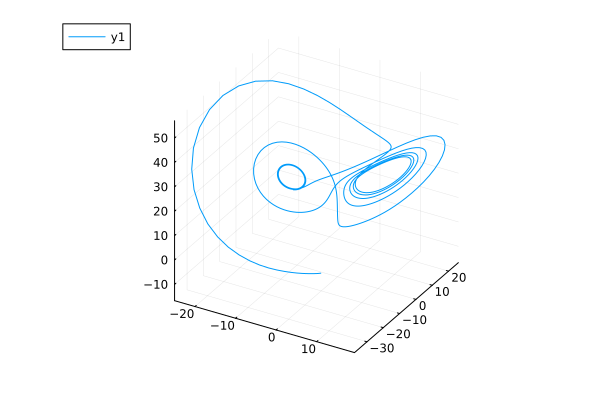

In [32]:
plot(lp[1,:],lp[2,:],lp[3,:])

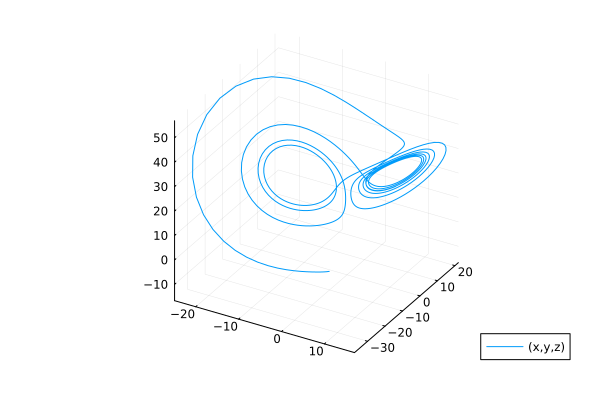

In [33]:
new_prob = remake(prob, u0 = lorenz_predict[1], tspan = (0,8))
new_sol = solve(new_prob, Tsit5(); reltol=1e-10, abstol=1e-11, saveat=0.01)
plot(new_sol, idxs=(1,2,3))

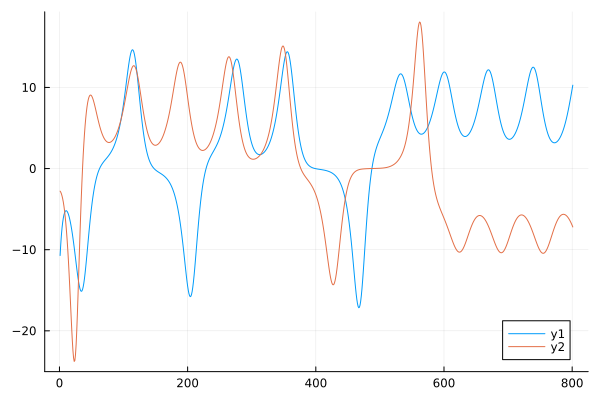

In [34]:
plot(sol[1,:])
plot!(lp[1,:])

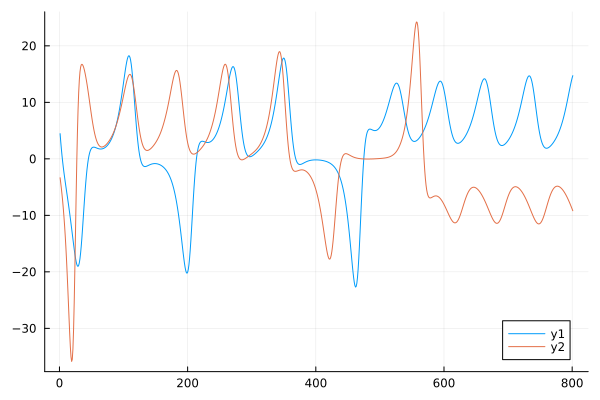

In [35]:
plot(sol[2,:])
plot!(lp[2,:])

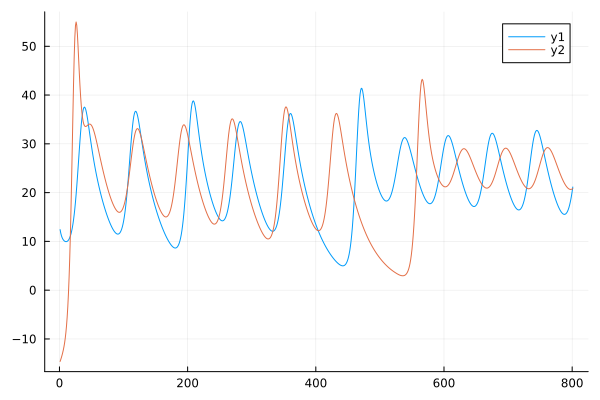

In [36]:
plot(sol[3,:])
plot!(lp[3,:])